In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import functools
import scipy.signal
from tqdm import tqdm
import inspect
import pickle
import sys
import json
import os
sys.path.append('../data_processing/')
sys.path.append('../validation/')
from feature import Feature

%matplotlib notebook

In [ ]:
%%time 

filepath = '../../data/test/seg_00030f.csv'

df = pd.read_csv(filepath, 
                 dtype={'acoustic_data': np.int16, 'time_to_failure': np.float32}, 
                 skiprows=1, 
                 names=['s', 'ttf'])

In [2]:
filepath = '../../data.nosync/train_short.h5'
df = pd.read_hdf(filepath, key='table')
df.head()

,s,ttf
0,12,1.4691
1,6,1.4691
2,8,1.4691
3,5,1.4691
4,8,1.4691


In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(df[df.columns[0]], 'k')
# plt.figure(figsize=(10, 5))
plt.plot(df[df.columns[1]], 'r')
# plt.figure(figsize=(10, 5))
plt.plot(df[df.columns[2]], 'b')

w_absolute_sum_of_changes(self, window_size=1000, window_stride=100): 100%|██████████| 9990/9990 [00:01<00:00, 8684.15it/s]
	 window decorator for w_absolute_sum_of_changes: 
	 - window size: 1000
	 - window stride: 100


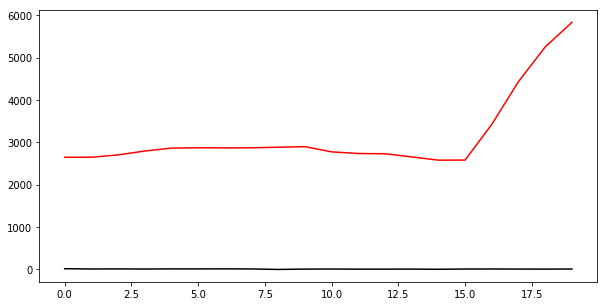

In [4]:
plt.figure(figsize=(10, 5))
plt.plot(df['s'][:20], 'k')
# plt.figure(figsize=(10, 5))
temp = Feature(df['s'], '../../data.nosync/')\
.w_absolute_sum_of_changes(window_size=1000, window_stride=100).data
plt.plot(temp[temp.columns[0]][:20], 'r')


In [ ]:
Feature(df['s'], '../../data.nosync/')\
.r_sta_lta(window_size=100, window_stride=100)\
.dump()\
.w_std(window_size=100, window_stride=100)\
.data

In [ ]:
df.rolling(100).mean()

In [ ]:
test = Feature(df.drop(['ttf'], axis=1), '../../data.nosync/')\
.w_periodogram(window_size=100, window_stride=100, N=1000)\

In [ ]:
test.w_std(window_size=100, window_stride=100).data

In [ ]:
p = Feature(df['ttf'], '../../data/')
p = getattr(p, 'mean')(window_size=100, window_stride=100)

In [ ]:
temp = [np.array([1, 2, 3]), np.array([2, 3, 4])]
dict(zip(["a", "b"], temp))

In [ ]:
funcs = {"functions": {"periodogram": {"N": 1000}, "mean": {}}}
for func_name, func_params in funcs['functions'].items():
    print(func_name, func_params)